In [1]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Medicalpremium.csv")

In [21]:
df.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

In [25]:
df['Diabetes'].max()

170.0

<Axes: >

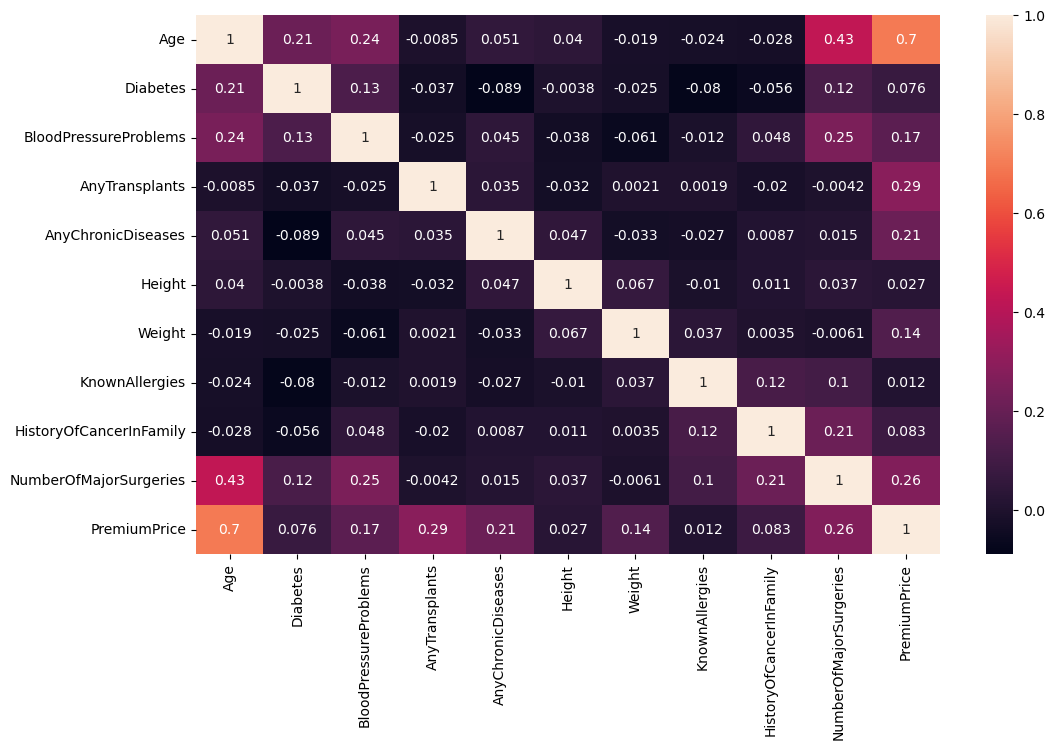

In [4]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(numeric_only='True'),annot=True)

In [20]:
X=df.drop(['PremiumPrice'],axis=1)

In [25]:
y=df['PremiumPrice']

In [27]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=40)

In [9]:
pip install lazypredict

In [10]:
from lazypredict.Supervised import LazyRegressor

In [11]:
lr=LazyRegressor()

In [12]:
model,prediction=lr.fit(X_train, X_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:12<00:00,  3.47it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001384 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 175
[LightGBM] [Info] Number of data points in the train set: 660, number of used features: 10
[LightGBM] [Info] Start training from score 24274.242424
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [13]:
model

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.75,0.76,3060.83,0.40
LGBMRegressor,0.75,0.75,3066.19,0.29
HistGradientBoostingRegressor,0.75,0.75,3067.43,1.09
RandomForestRegressor,0.74,0.75,3121.18,0.60
ExtraTreesRegressor,0.72,0.73,3229.81,0.44
XGBRegressor,0.68,0.69,3454.13,0.51
BaggingRegressor,0.67,0.68,3495.21,0.13
DecisionTreeRegressor,0.65,0.66,3610.23,0.08
LassoLarsIC,0.64,0.65,3667.76,0.26


In [31]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
rfr=RandomForestRegressor()

In [35]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [63]:
print(type(y_pred_test)) 

<class 'numpy.ndarray'>


In [41]:
y_pred_train=rfr.predict(X_train)

In [43]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test,y_pred_test))

3507.73031286912

In [45]:
y_pred_test=rfr.predict(X_test)

np.sqrt(mean_squared_error(y_train,y_pred_train))

895.7131091777111

In [47]:
rfr_grid_search.best_params_

NameError: name 'rfr_grid_search' is not defined

In [55]:
#To avoid having too many names I had kept the parameters broader however, from the above best_params is overwritten now
rf_param_grid={'max_depth':[None],'min_samples_split':[2],'min_samples_leaf':[3],'criterion':['squared_error'],'n_estimators':[100]}

In [57]:
from sklearn.model_selection import GridSearchCV

In [59]:
rfr_grid_search=GridSearchCV(estimator=rfr, param_grid=rf_param_grid, cv=5, scoring='neg_mean_squared_error')

In [61]:
rfr_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error'], 'max_depth': [None],
                         'min_samples_leaf': [3], 'min_samples_split': [2],
                         'n_estimators': [100]},
             scoring='neg_mean_squared_error')

In [63]:
rfr_best_model=rfr_grid_search.best_estimator_

In [73]:
y_test_bestpred=rfr_best_model.predict(X_test)

np.sqrt(mean_squared_error(y_test,y_test_bestpred))

3493.676288013017

In [67]:
y_train_bestpred=rfr_grid_search.predict(X_train)

np.sqrt(mean_squared_error(y_train,y_train_bestpred))

1601.0098355569576

In [ ]:
#np.sqrt(mean_squared_error(y_train,y_pred_train))
#1068.3231692420577

#np.sqrt(mean_squared_error(y_train,y_train_bestpred))
#2018.1116562688144
#After performing hyperparameter tuning using GridSearchCV, the default Random Forest model which was found to be overfit is now a tuned model in terms of test MSE. 
 
#Therefore, the Random Forest model with hyperparameter tuning was selected as the final model for deployment.

In [77]:
import joblib

In [83]:
joblib.dump(rfr_grid_search,'rfr default model1.pkl')

['rfr default model1.pkl']